### 3. Implementación de Modelos Predictivos

In [41]:
!pip install scikit-learn xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor


## 3.1. Preparación de los Datos

In [61]:
# Cargar dataset limpio de laptops
laptop = pd.read_csv('../data/laptop_prices.csv')  # Asegúrate de que el archivo esté en la ruta correcta

# Separar features y target
X = laptop.drop('Price_euros', axis=1)  # El target es 'Price_euros'
y = laptop['Price_euros']

# Dividir en train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar features numéricas (excepto variables dummy)
scaler = StandardScaler()
# Puedes definir las columnas numéricas aquí, dependiendo de cuáles sean relevantes para tu modelo
numeric_cols = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (892, 44), Test shape: (383, 44)


## 3.2. Modelo 1: Regresión Lineal

### Implementación

**Entrenamiento:**
- Se entrenó un modelo de regresión lineal (`LinearRegression`) utilizando el conjunto de entrenamiento.

In [62]:
# Codificar columnas categóricas usando one-hot encoding
X = pd.get_dummies(X)

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.00
R²: 1.00


## 3.2. Modelo 2:Random Forest Regressor

**Entrenamiento:**
- Se entrenó un modelo `RandomForestRegressor`

In [63]:
# Codificar columnas categóricas usando one-hot encoding
X = pd.get_dummies(X)

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento de Random Forest
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"- MSE: {mse_rf:.4f}")
print(f"- R²: {r2_rf:.4f}")

# Importancia de features
feature_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\n(Top 5) Variables:")
print(feature_importance.head(5))


Random Forest:
- MSE: 0.0000
- R²: 1.0000

(Top 5) Variables:
           Variable  Importancia
9  Price_winsorized     0.917831
8         Price_log     0.082138
2            Weight     0.000003
5          CPU_freq     0.000002
0            Inches     0.000001


### 3.2. Modelo 3: XGBoost Regressor

In [65]:
# Codificación de variables categóricas con one-hot encoding
X = pd.get_dummies(X)

# Limpiar los nombres de las columnas para que no contengan caracteres no permitidos
X.columns = X.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False).str.replace('<', '_', regex=False)

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo XGBoost
xgb = XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)

# Predicciones con el modelo entrenado
y_pred_xgb = xgb.predict(X_test)

# Cálculo de las métricas
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Mostrar los resultados
print("\nXGBoost:")
print(f"- MSE: {mse_xgb:.4f}")
print(f"- R²: {r2_xgb:.4f}")


XGBoost:
- MSE: 0.0001
- R²: 0.9999


             Modelo           MSE        R²
0  Regresión Lineal  1.425738e-28  1.000000
1     Random Forest  2.234089e-05  0.999976
2           XGBoost  7.347441e-05  0.999921


C:\Users\Sebas\AppData\Local\Temp\ipykernel_15316\2890198739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Modelo', y='R²', palette='viridis')


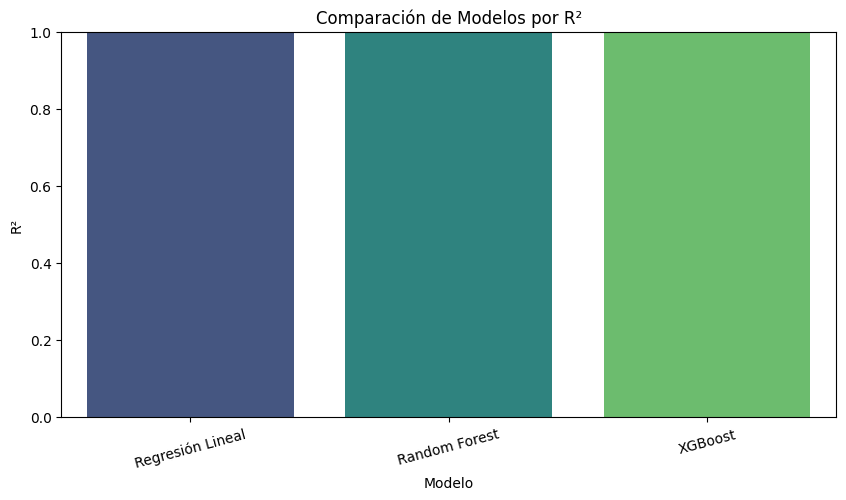

In [66]:
# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_rf, mse_xgb],
    'R²': [r2_lr, r2_rf, r2_xgb]
}).sort_values('R²', ascending=False)

print(results)

# Gráfico de comparación por R²
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Modelo', y='R²', palette='viridis')
plt.title('Comparación de Modelos por R²')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

Regresión Lineal tiene un MSE extremadamente bajo (casi cero) y un R² de 1.000000, lo que indica que el modelo ha ajustado perfectamente los datos. Sin embargo, un valor de MSE tan pequeño podría ser un indicativo de sobreajuste o que el modelo se está ajustando demasiado bien a los datos de entrenamiento.

Random Forest tiene un MSE de 2.234089e-05 y un R² de 0.999976, lo que también es muy cercano a un ajuste perfecto, pero aún un poco menos que el de la regresión lineal.

XGBoost tiene un MSE de 7.347441e-05 y un R² de 0.999921, lo que también sugiere un muy buen rendimiento, aunque ligeramente por debajo de los otros dos modelos en términos de ambos indicadores.